In [8]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image

# Replace the model version with your required version if needed
pipeline = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1", torch_dtype=torch.float16
)

# Running the inference on GPU with cuda enabled
pipeline = pipeline.to('cuda')

prompt = "cityscape"

image = pipeline(prompt=prompt).images[0]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

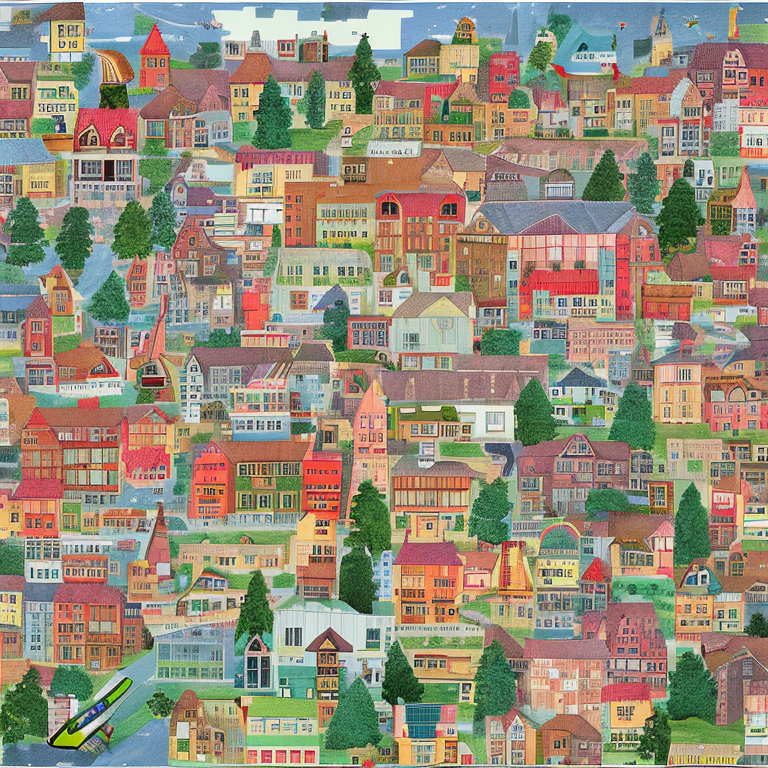

In [9]:
from IPython.display import display
display(image)

In [11]:
pip install torch diffusers pillow

In [17]:
from PIL import Image

def embed_text_in_lsb(image_path, text):
  img = image
  pixels = img.load()
  width, height = img.size
  binary_data = ''.join(format(ord(char), '08b') for char in text) + '11111111'  # End marker
  max_bits = width * height * 3

  if len(binary_data) > max_bits:
    print(f"Text is too long to be embedded.")
    return None

  # Embed binary data into LSBs of pixels
  index = 0
  for x in range(width):
    for y in range(height):
      r, g, b = pixels[x, y]

      # Embed 1 bit into each color channel
      if index < len(binary_data):
        r = (r & 0xFE) | int(binary_data[index])
      if index + 1 < len(binary_data):
        g = (g & 0xFE) | int(binary_data[index + 1])
      if index + 2 < len(binary_data):
        b = (b & 0xFE) | int(binary_data[index + 2])

      pixels[x, y] = (r, g, b)
      index += 3

  return img

# Example usage:
text_to_embed = "This is AI-generated"
output_path = "watermarked_image.png"

image.save("original_image.png")

modified_image = embed_text_in_lsb(image, text_to_embed)

if modified_image:
  modified_image.save(output_path)
  print(f"Text embedded in image and saved as '{output_path}'")

Text embedded in image and saved as 'watermarked_image.png'


In [18]:
from PIL import Image

def extract_text_from_lsb(image_path):
  try:
    img = Image.open(image_path)
  except FileNotFoundError:
    print(f"Error: Image file not found at '{image_path}'")
    return None

  pixels = img.load()
  width, height = img.size

  binary_data = ""
  for x in range(width):
    for y in range(height):
      r, g, b = pixels[x, y]

      # Extract 1 bit from each color channel
      binary_data += str(r & 1)
      binary_data += str(g & 1)
      binary_data += str(b & 1)

  # Split binary data into 8-bit chunks
  text_bytes = [binary_data[i:i+8] for i in range(0, len(binary_data), 8)]

  # Convert binary chunks to characters
  extracted_text = ""
  for byte in text_bytes:
    if byte == '11111111':  # End marker
      break
    extracted_text += chr(int(byte, 2))

  return extracted_text

# Example usage:
image_path = "watermarked_image.png"

extracted_text = extract_text_from_lsb(image_path)

if extracted_text:
  print("Extracted text:", extracted_text)


Extracted text: This is AI-generated
